## Least Squares Fitting for Nonlinear Functions 

Often in physics one will come across a set of data that theoretically fit a nonlinear model. In this case, it is necessary to use computational techniques in order to determine the least squares fitting curve, as such a model is difficult or impossible to solve analytically. Before we get into the computation itself, though, it is helpful to understand the math behind the computation. For the technique below, it is assumed that we can approximate a set of guess parameters and estimate about how far off they could be.

## Solving for a general least squares model

In least squares, we try to minimize the squares of the difference between a best fit model and the data we have. This is minimizing the function
$$
\chi^2 = \sum_{i=1}^{N}(x_i - f(t_i: \lambda_1 ... \lambda_M))^2
$$
where $(t_i, x_i)$ are our $N$ number data points and ${\lambda_1...\lambda_M}$ is our set of $M$ parameters for the best fit model.

In order to do this, we differentiate $\chi^2$ with respect to each parameter and set the result equal to zero. This results in a system of $M$ equations, as shown below.

\begin{align*}
\frac{\partial\chi^2}{\partial\lambda_1} &= -2\sum_{i=1}^{N}(x_i - f(t_i: \lambda_1 ... \lambda_M))\frac{\partial f}{\partial\lambda_1}=0 \\
\frac{\partial\chi^2}{\partial\lambda_2} &= -2\sum_{i=1}^{N}(x_i - f(t_i: \lambda_1 ... \lambda_M))\frac{\partial f}{\partial\lambda_2}=0\\
...\\
\frac{\partial\chi^2}{\partial\lambda_M} &= -2\sum_{i=1}^{N}(x_i - f(t_i: \lambda_1 ... \lambda_M))\frac{\partial f}{\partial\lambda_M}=0
\end{align*}

Since the partial derivatives $\partial f/\partial\lambda_1 ... \partial f/\partial\lambda_M$ are not predictably zero, we must find where $x_i - f(t_i : \lambda_1 ... \lambda_M) = 0$.

We can rewrite
$$
x_i - f(t_i : \lambda_1 ... \lambda_M) = 0
$$
as
$$
x_i = f(t_i : \lambda_1 ... \lambda_M),
$$

but we know that right now, that isn't the case; instead,
$$
x_i = f(t_i : \lambda_1 ... \lambda_M) + C_i,
$$
where $C_i$ is some constant that is different for every data point.

It turns out that we know $C_i$ from multivariable calculus, since what we are doing now is a linearization of $x_i - f(t_i : \lambda_1 ... \lambda_M) = 0$.

$$
C_i =  \sum_{j=1}^M \frac{\partial f_i}{\partial\lambda_j}a_j
$$
where $a_j$ is the amount $\lambda_j$ must change for the right side of the equation to equal $x_i$.

Computationally, 
$$
\frac{\partial f_i}{\partial\lambda_j} = \frac{f(t_i: \lambda_1 ... \lambda_j + \Delta\lambda_j ... \lambda_M)-f(t_i: \lambda_1 ... \lambda_j ... \lambda_M)}{\Delta\lambda_j}
$$
where $\Delta\lambda_j$ is some finite change in $\lambda_j$. However, this is susceptible to roundoff error since $\lambda_j$ could be very small, so instead it is typical to define $b_j$ as $a_j/\Delta\lambda_j$ and write the equation as

$$
x_i = f(t_i: \lambda_1 ... \lambda_M) + \sum_{j=1}^M [(f(t_i: \lambda_1 ... \lambda_j + \Delta\lambda_j ... \lambda_M)-f(t_i: \lambda_1 ... \lambda_j ... \lambda_M))b_j]
$$
or more neatly,
$$
\Delta x_i = \sum_{j=1}^M \Delta f_i b_j
$$
where $\Delta x_i$ is the difference between the data and the model and $\Delta f_i$ is $f(t_i: \lambda_1 ... \lambda_j + \Delta\lambda_j ... \lambda_M)-f(t_i: \lambda_1 ... \lambda_j ... \lambda_M)$.

Once all the data points are taken into account, these turn into matrices, with

$$
\mathbf{\Delta x} = \begin{pmatrix} \Delta x_1 \\ \Delta x_2 \\ \vdots \\ \Delta x_N
\end{pmatrix}
$$

$$
\mathbf{A} = \begin{pmatrix} \Delta f_1(t_1) & ... & \Delta f_M (t_1) \\ \Delta f_1(t_2) & ... & \Delta f_M (t_2)  \\ \vdots & \ddots & \vdots \\ \Delta f_1(t_N) & ... & \Delta f_M (t_N) 
\end{pmatrix}
$$

and

$$
\mathbf{b} =  \begin{pmatrix} b_1 \\ \vdots \\ b_M \end{pmatrix}
$$

making the equation

$$
\mathbf{\Delta x} = \mathbf{A} \mathbf{b}
$$

$\mathbf{A}$ is referred to as the design matrix.

We can approximate the design matrix from our guess parameters, with $\Delta\lambda_j$ being our estimate for how off our guess parameters are. Therefore we want to solve for $\mathbf{b}$.

However, since $\mathbf{A}$ is not a square matrix, we can't simply find its inverse. First we must multiply both sides by the transpose of $\mathbf{A}$.

$$
\mathbf{A^T} \mathbf{\Delta x} = \mathbf{A^T} \mathbf{A} \mathbf{b}
$$

Then, in finding the inverse of $\mathbf{A^TA}$, we can finally solve for $\mathbf{b}$.

Since we earlier defined $b_j$ as $a_j/\Delta\lambda_j$, and $a_j$ is how far off from the best fit model our parameters are, we can then say that $\lambda_{j (best)} = \lambda_{j (guess)} + b_j \Delta\lambda_j$, which is true for each parameter in our model.

Note that since we used guess parameters to calculate $\mathbf{A}$, our determinations of the least squares fitting parameters may not be exact. If higher precision is required, one can iterate through this process multiple times until values in $\mathbf{b}$ are very small, at which point the least squares function has reached a more precise approximate minimum.

### The Covariance Matrix

The covariance matrix, which is a square matrix that gives [covariances](https://en.wikipedia.org/wiki/Covariance) between parameters $1$ to $M$ at indices $1$ through $M$ (and therefore gives the [variances](https://en.wikipedia.org/wiki/Variance) on the diagonal), can be determined by first dividing each row of the design matrix by the vector $\mathbf{\Delta\lambda}$ of our estimate for how far off our guess parameters are from the best fit model. This produces a matrix $\mathbf{D}$ where

$$
\mathbf{D} = \begin{pmatrix} \frac{\Delta f_1(t_0)}{\Delta\lambda_1} & ... & \frac{\Delta f_M (t_0)}{\Delta\lambda_M} \\ \frac{\Delta f_1(t_1)}{\Delta\lambda_1} & ... & \frac{\Delta f_M (t_1)}{\Delta\lambda_M}  \\ \vdots & \ddots & \vdots \\ \frac{\Delta f_1(t_N)}{\Delta\lambda_1} & ... & \frac{\Delta f_M (t_N)}{\Delta\lambda_M} \end{pmatrix}.
$$

The covariance matrix $\mathbf{C}$ is then related to $\mathbf{D}$ by

$$
\mathbf{C} = \mathbf{(D^T}\mathbf{D)^{-1}}.
$$

### Extensions

$\bullet$ It is possible to use the above method for finding the best fitting parameters to a data set that does not follow an explicit analytic function. For example, if the data follows a given differential equation but the equation is not solvable analytically, the model "function" one uses for least squares fitting can actually be a numeric integration technique that solves the differential equation, resulting in a model data set.

$\bullet$ It can sometimes be useful to freeze a few of the parameters inputted into the least squares fitting so that those parameters do not vary while finding the best fit. For example, if we are fitting a curve to a data set measuring position of a particle, and we know that the particle started at the origin, we may want to ensure that the model data set has the initial position at 0. This could be implemented by setting the parameter's guess step size to zero, although doing so requires some extra code so that the program does not try to divide elements by the step size of 0 and does not try to still include the frozen parameter in the design matrix; it is also implementable through a list of booleans corresponding to whether or not a $j$th parameter is frozen.

$\bullet$ It is also worth considering user interfaces – how a user will input the guess parameters and where the user will be able to access the final results. This is often easily implemented through text files.

$\bullet$ Consider storing a generic implementation of nonlinear least squares fitting in your personal python library so that you can use it easily for a variety of data sets and model functions.

### Note 

For nonlinear least squares fitting, it is possible that there will be multiple minima to $\chi^2$. This means that it can produce terrible fits if the guess parameters and step sizes are not accurate enough. Thus it is vital that these estimations are as accurate as possible. It can be helpful to first try to fit a few curves by hand so that you can have a good understanding of the approximate parameters needed.

## A Computational Example: Nonlinear Least Squares Fitting for a Mass on a Spring

### Setting Up Our Data and Parameters 

In [1]:
# Imports that will be used in code

import numpy as np # For more refined numeric operations
import matplotlib.pyplot as plt # For graphing
# For showing the graphs inline of the notebook
%matplotlib inline

Imagine that we have a set of data for time and position of a mass on a Hookian spring. I have compuationally generated such a data set and added some variation in the position so that the least squares fitting cannot come up with a perfect fit.

In [2]:
# Retrieves data set from file
data = np.genfromtxt("/Users/Hope/Desktop/MassOnSpring.txt")
time = data[0]
data_position = data[1]

Now we need a model to which to fit our data. We know from introductory physics that the force $F$ generated by a Hookian spring is given by 
$$
F = -kx,
$$
which, when combined with Newton's second law, gives us the equation of motion
$$
a = -\frac{k}{m} x.
$$
It would be possible to use numerical integration techniques with this equation of motion to generate our model fit for least squares fitting, but for now we will analytically solve this to get the result
$$
x(t) = x_0\cos(\omega t) + \frac{v_0}{\omega}\sin(\omega t),
$$
where $x_0$ is initial position, $v_0$ is initial velocity, and $\omega$ is angular frequency $\sqrt{k/m}$.

We will define this in python as the function SMH_pos. For convinience later on, $\omega$, $x_0$, and $v_0$ will be passed in as a list of parameters.

In [3]:
# parameter list: [omega, initial position, initial velocity]
def SMH_pos(time,parameters):
    omega = parameters[0]
    init_pos = parameters[1]
    init_vel = parameters[2]
    return init_pos*np.cos(omega*time) + init_vel/omega * np.sin(omega * time)

We also need some guess parameters so that we can run least squares. Let's plot our data to get a good estimate.

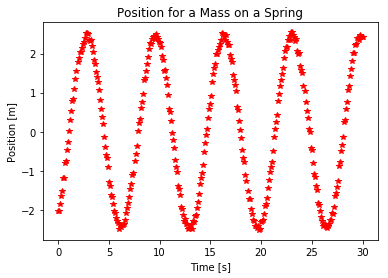

In [4]:
plt.plot(time,data_position,"r*")
plt.xlabel("Time [s]")
plt.ylabel("Position [m]")
plt.title("Position for a Mass on a Spring")

It looks like the plot has a period of about $2\pi$, so let's guess that $\omega\approx1$. The initial position looks to be around -2.0 or so, and while inital velocity is harder to estimate without some calculations, let's guess that it's around 1. So we have our guess parameters at

$$
\omega\approx1\qquad x_0\approx-2.0\qquad v_0\approx1,
$$

and let's say our guesses are all off by .1 or so.

In [5]:
guess_parameters = [1,-2.0,1.0]
guess_step_size = [.1,.1,.1]

Now we can actually start the calculations.

### Running Least Squares

Let's start by calculating the $\mathbf{\Delta x}$ vector, where

$$
\Delta x_i = x_i - f(t_i: \lambda_1 ... \lambda_M)
$$

In [6]:
change_in_pos = data_position - SMH_pos(time,guess_parameters)
#change_in_pos = np.transpose(change_in_pos)

And now we'll calculate the design matrix by looping through the different parameters and incrementing them separately, thereby calculating each column of the design matrix.

In [7]:
# Creates the design matrix so we can use it in the loop; np.zeros() is useful for this.
design = np.zeros((len(data[0]),len(guess_parameters)))

# Loops through each parameter
for j in range(len(guess_parameters)):
    
    # Calculates the parameter list with one changed by the guess step size
    parameters_with_one_inc = list(guess_parameters)  # Must create a copy of guess_parameters due to object reference
    parameters_with_one_inc[j] += guess_step_size[j]
    
    # Calculates the change in the model function and puts it in the design matrix
    
    # Transposition (which can be done with np.transpose) is necessary in following lines because we want a column 
    # of the design matrix, while one-dimensional lists in python correspond to rows of two-dimensional arrays.
    model_function_with_inc = np.transpose(SMH_pos(time,parameters_with_one_inc)) 
    model_function_with_normal_parameters = np.transpose(SMH_pos(time,guess_parameters))
    design_column = model_function_with_inc - model_function_with_normal_parameters
    # The array indexing notation [row,column] works for numpy arrays such as design. The : is from python array 
    # slicing and indicates that we want the elements from all row indices.
    design[:,j] = design_column
 

Then, calculating the transpose is trivial because of the [np.transpose](https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.transpose.html) method.

In [8]:
design_t = np.transpose(design)

To solve for $\mathbf{b}$, we will use [np.linalg.solve](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html), because the values in the design matrix could be small enough that numerical matrix inversion would lead to less precision. The np.dot method performs matrix multiplication.

In [9]:
b = np.linalg.solve(np.dot(design_t,design),np.dot(design_t,change_in_pos))

Finally, we calculate the best fit parameters from $\mathbf{b}$.

In [10]:
best_fit_parameters = guess_parameters + b*guess_step_size

Then, we can plot the curve with the data to see how well the fitting worked.

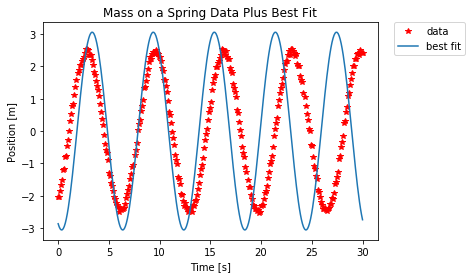

In [11]:
plt.plot(time,data_position,"r*",label="data")
plt.plot(time,SMH_pos(time,best_fit_parameters),label='best fit')
plt.xlabel("Time [s]")
plt.ylabel("Position [m]")
plt.title("Mass on a Spring Data Plus Best Fit")
# A useful function for showing the legend of a graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

So our fit is pretty okay, but could be a lot better. It's likely that we just need to iterate through our least squares fitting a few more times to produce a more accurate result. I will set up this loop with the condition to stop running once the amount the parameters have to change ($b_j \Delta\lambda_j$) is less than .1% of the given parameter value.

In [12]:
loop_should_reiterate = True

while(loop_should_reiterate):
    change_in_pos = data_position - SMH_pos(time,guess_parameters)

    # Creates the design matrix so we can use it in the loop; np.zeros() is useful for this.
    design = np.zeros((len(data[0]),len(guess_parameters)))

    # Loops through each parameter
    for j in range(len(guess_parameters)):
        parameters_with_one_inc = list(guess_parameters)# Must copy guess_parameters due to object reference
        parameters_with_one_inc[j] += guess_step_size[j]
        # Transposition (which can be done with np.transpose) is necessary in following lines because we want a column 
        # of the design matrix, while one-dimensional lists in python correspond to rows of two-dimensional arrays.
        model_function_with_inc = np.transpose(SMH_pos(time,parameters_with_one_inc)) 
        model_function_with_normal_parameters = np.transpose(SMH_pos(time,guess_parameters))
        design_column = model_function_with_inc - model_function_with_normal_parameters
        # The array indexing notation [row,column] works for numpy arrays such as design. The : is from python array 
        # slicing and indicates that we want the elements from all row indices.
        design[:,j] = design_column

    design_t = np.transpose(design)
    b = np.linalg.solve(np.dot(design_t,design),np.dot(design_t,change_in_pos))
    best_fit_parameters = guess_parameters + b*guess_step_size
    
    # np.all checks the truth values of an entire array and returns True only if all values in the array are True.
    if(np.all(abs(b*guess_step_size/guess_parameters)<.001)):
        loop_should_reiterate = False
        
    # The reiteration will run the guess parameters as the best fit parameters it calculated from this iteration.
    guess_parameters = best_fit_parameters


Let's see if this fit is any better.

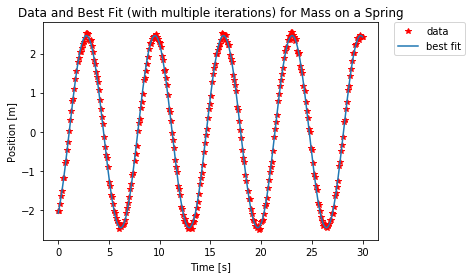

In [13]:
plt.plot(time,data_position,"r*",label="data")
plt.plot(time,SMH_pos(time,best_fit_parameters),label="best fit")
plt.xlabel("Time [s]")
plt.ylabel("Position [m]")
plt.title("Data and Best Fit (with multiple iterations) for Mass on a Spring")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Now, let's calculate our covariance matrix and see what it looks like compared to our best fit parameters.

In [14]:
D = design/guess_step_size
D_t = np.transpose(D)
covariance = np.linalg.inv(np.dot(D_t,D))

In [15]:
print("omega",best_fit_parameters[0])
print("initial position",best_fit_parameters[1])
print("initial velocity",best_fit_parameters[2])
print()
print("   omega\t    initial position  initial velocity")
print(covariance)

omega 0.92963799731
initial position -2.09070107494
initial velocity 1.2099432179

   omega	    initial position  initial velocity
[[  1.97003250e-05  -5.46736661e-04  -8.47413168e-06]
 [ -5.46736661e-04   2.19042058e-02   2.11344150e-04]
 [ -8.47413168e-06   2.11344150e-04   5.71138835e-03]]


Our covariance matrix looks reasonably small, so let's calculate deviations so we can express our final result.

In [16]:
omega_dev = np.sqrt(covariance[0][0])
init_pos_dev = np.sqrt(covariance[1][1])
init_vel_dev = np.sqrt(covariance[2][2])
print("omega standard deviation",omega_dev)
print("initial position standard deviation",init_pos_dev)
print("initial velocity standard deviation",init_vel_dev)

omega standard deviation 0.00443850481292
initial position standard deviation 0.148000695405
initial velocity standard deviation 0.0755737279278


So our final result is
$$
\omega = 0.930 \pm .004 \quad x_0 = -2.09 \pm 0.15 \quad v_0 = 1.21 \pm 0.08
$$